# Salamanders on an island

## The Problem

From A Concise Introduction to Pure Mathematics By Martin Liebeck

Critic Ivor Smallbrain is watching the horror movie Salamanders on a Desert Island. In the film, there are 30 salamanders living on a desert island: 15 are red, 7 blue and 8 green. When two of a different colour meet, horrifyingly they both change into the third colour. (For example, if a red and a green meet, they both become blue.) When two of the same colour meet, they change into both of the other colours. (For example, if two reds meet, one becomes green and one becomes blue.) It is all quite terrifying. In between being horrified and terrified, Ivor idly wonders whether it could ever happen that at some instant in the future, all of the salamanders would be red. Can you help him ? (Hint: Consider the remainders of the totals of each colour when you divide by 3.) 

## Simulate the problem

In [1]:
import numpy as np
import random

### Create the starting salamander population

In [2]:
pop = ['R']*15 + ['B']*7 + ['G']*8
pop = np.array(pop) # Convert to numpy array
all_col = set(pop) # Create set of all possible colours

pop

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'G', 'G', 'G', 'G',
       'G', 'G', 'G', 'G'], dtype='<U1')

### Define a function for a random meeting

In [3]:
def meeting(gd = False):
    """
    Simulate meeting of 2 salamnders.
    Each is chosen at random from the list (without replacement)
    `gd = True` applies a proxy of gradient descent optimisation, avoiding reduction in the number of red salamanders
    """

    # Pick 2 salamanders at random
    rand_ind = random.sample(range(pop.size), 2)
    rand_sam = pop[rand_ind]

    x = rand_sam[0]
    y = rand_sam[1]

    # Apply gradient descent - skip the meeting if a red is selected, to avoid reducng the Reds number
    # (Note this is a gd proxy to reduce computation - it "should" be applied on the result of calculation rather than the input)
    if gd == True:
        if (x == 'R') | (y == 'R'): return

    # Find the colour(s) not selected
    diff = list(all_col.difference(rand_sam))
    
    # The salamanders are the same colour
    if x == y: 
        x = diff[0]
        y = diff[1]
    else: # The salamanders are different colour
        x = diff[0]
        y = x

    # Change the colours of the chosen salamanders
    pop[rand_ind[0]] = x
    pop[rand_ind[1]] = y


### Run 1 million simulations

In [4]:
# Set number of meetings to simulate
iters = 1000000

# Run simulation of meetings
from collections import Counter
from tqdm.notebook import tqdm

random.seed(2718)
tracker = dict()
for i in tqdm(range(iters), miniters=iters/100):
    # Simulate a meeting
    meeting()
    # Save resulting population state
    tracker[i] = Counter(pop)

  0%|          | 0/1000000 [00:00<?, ?it/s]

## Analysis

The question posed gives a (big) hint to using modular arithmetic to assess this problem. A sample of the results is therefore taken and visualised in mod 3.

### Sample first 100 results in modulo 3

In [5]:
# Sample the first 100 meetings to visualise progress
track_vals = list(tracker.values())
track_vals = track_vals[:100]

# Create a list of each colour in mod 3
r = []
b = []
g = []
for i in range(len(track_vals)):
    r.append(list(track_vals)[i]['R'] %3)
    b.append(list(track_vals)[i]['B'] %3)
    g.append(list(track_vals)[i]['G'] %3)

Text(0.5, 1.0, 'Total Quantity of Salamanders in mod 3')

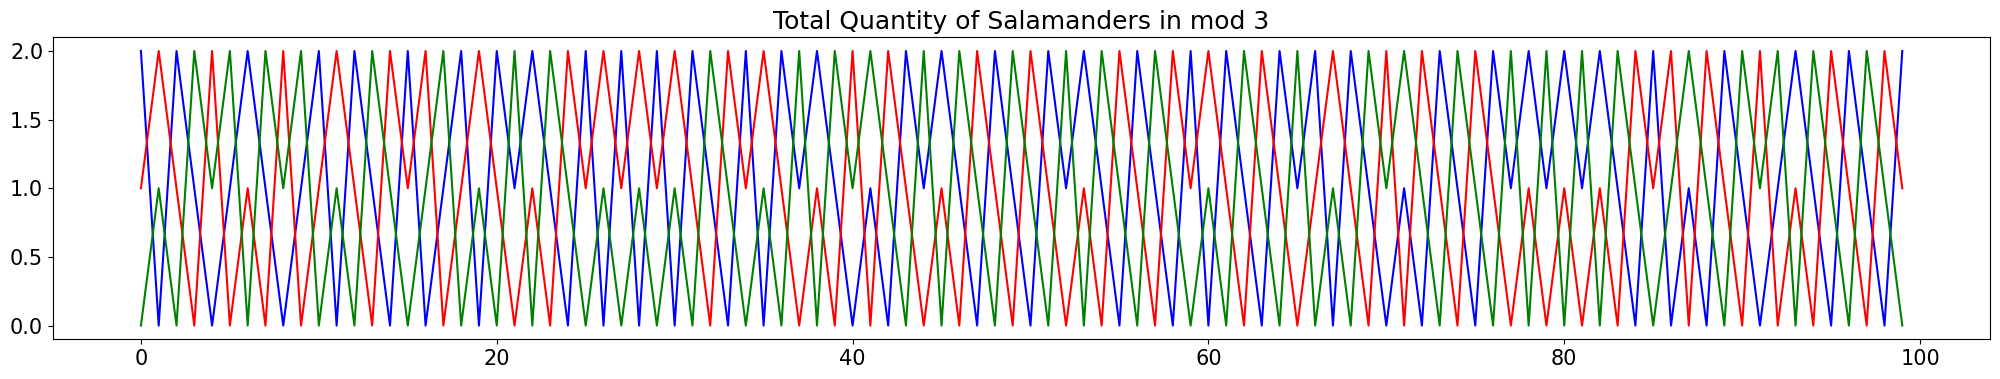

In [6]:
# Plot graph of population change in mod 3
import pylab as plt
from matplotlib.pyplot import figure
%matplotlib inline

figure(figsize=(25, 4), dpi=100)
plt.rcParams.update({'font.size': 15})

plt.plot(range(len(b)), b, 'b')
plt.plot(range(len(r)), r, 'r')
plt.plot(range(len(g)), g, 'g')
plt.title('Total Quantity of Salamanders in mod 3')

### Modulus importance

In [7]:
# Prepare some data for explanation
import pandas as pd
meet_s = [['-2','+1','+1']]
meet_s_mod = [['+1','+1','+1']]
meet_d = [['-1','-1','+2']]
meet_d_mod = [['+2','+2','+2']]

We observe that the red, blue, and green numbers are always different, and hold either a value of 0, 1, or 2 in mod3.
This is important, as for there to be 30 Red salamanders, there need to be 0 Blue and 0 Green (total population is 30). In mod3, this would be equivalent to 0R, 0B, and 0G. In other words, for there to be all Red salamanders, there needs to be a combination of meetings such that all colours reach 0 (mod3). In this small sample, we can see that the values of each are always different in mod 3. Why is this?

The starting position of the population is 15R, 7B, and 8G. In mod3, this equates to 0R, 1B and 2G.
Upon two salamanders of the same colour, `x`, meeting, we get a drop in 2 of that colour, and an increase of 1 for the other two colours, `y` and `z`:

In [8]:
pd.DataFrame(meet_s, ['xx'], ['x', 'y', 'z'])

,x,y,z
xx,-2,+1,+1


In mod3, this is equivalent to:

In [9]:
pd.DataFrame(meet_s_mod, ['xx'], ['x', 'y', 'z'])

,x,y,z
xx,+1,+1,+1


We see that for whichever colour, if the salamanders are the same colour, the same mathematical addition applies to all colours in mod3, such that there is no convergence between colours.  
Two salamanders of different colour meeting results in:

In [10]:
pd.DataFrame(meet_d, ['xy'], ['x', 'y', 'z'])

,x,y,z
xy,-1,-1,+2


In mod3, this is rewritten:

In [11]:
pd.DataFrame(meet_d_mod, ['xy'], ['x', 'y', 'z'])

,x,y,z
xy,+2,+2,+2


Again, where salamander colours are different, there is no convergence between colours in mod3.

This exhausts all meeting possibilities, and shows there is no possibility of convergence between quantities of each colour in mod3. With this being the case, it is impossible for all to reach 0 (mod3). This means that there can never be 30 Red salamanders.

However, 29R is possible, with 0B and 1G. This maintains the count structure in mod3 as this would be 2R, 0B, 1G (mod3).

### Total Reds

#### Max Reds

Text(0.5, 1.0, 'Max Quantity of Red Salamanders every 4000 trials')

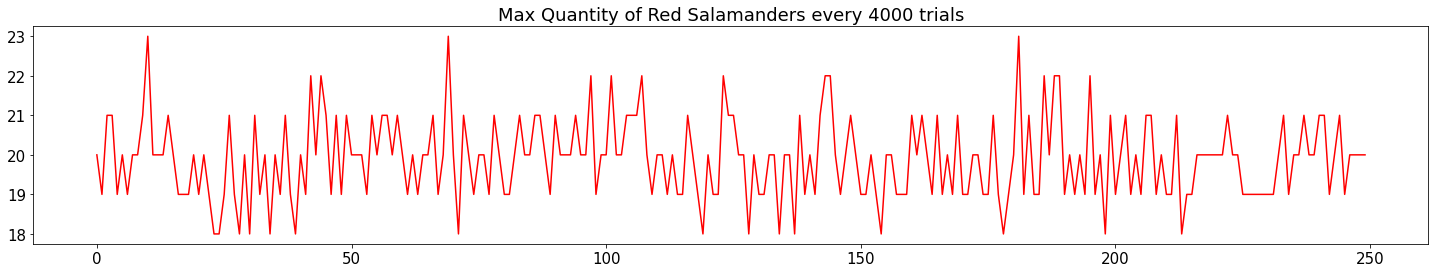

In [12]:
# Show how the number of reds changes over trials
r_vals = []
for trial in tracker.values():
    r_vals.append(trial['R'])

graph_len = np.min([250,len(r_vals)])
mov_max = int(np.ceil(len(r_vals)/graph_len))

red_mov_max = []
for i in range(graph_len):
    red_mov_max.append(np.max(r_vals[i*mov_max:(i+1)*mov_max]))

figure(figsize=(25, 4))
plt.plot(range(graph_len), red_mov_max, 'r')
plt.title('Max Quantity of Red Salamanders every ' + str(mov_max) + ' trials')

We observe that even over 1 million trials, the maximum number of Red salamanders never reaches 29. This suggests that whilst 29R is a possibility, it is highly unlikely to occur through the random sampling used.

#### Frequency of Red count

Text(0.5, 1.0, 'Histogram of Total Quantity of Red Salamanders')

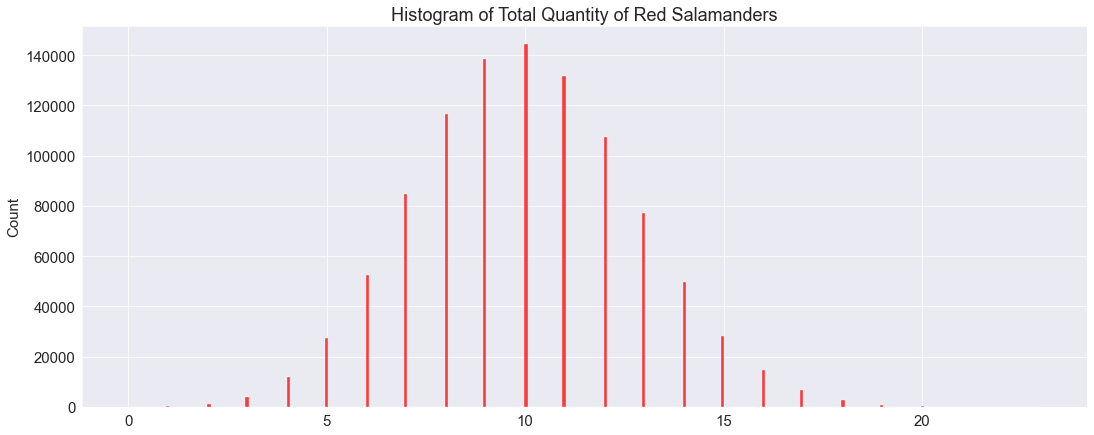

In [13]:
# Count frequency of Reds quantities over the trials
import seaborn as sns

figure(figsize=(18, 7))
sns.set_style('darkgrid')
sns.histplot(r_vals, color='r')
plt.title('Histogram of Total Quantity of Red Salamanders')

We observe that the histogram shows a bell-like curve of distribution. As may be expected, the modal number of Reds is 10, or 1/3 of the total population. This reflects that with more Reds present in the population, there is a higher probability of a Red being selected and therefore the number of Reds being reduced. The opposite can be observed below this level, and a similar graph would be expected for Blues and Greens.  
We can see that the graph tails off drastically above 20R - if we were to assume that the number of Reds is approximately normally distributed, we could estimate the probability of getting the maximum number of Reds (29).

In [14]:
from scipy.stats import norm
mean = np.mean(r_vals)
std = np.std(r_vals)

norm.pdf(29, loc=mean, scale=std)

4.750575739333807e-12

This result suggests that, as a rough figure, even if we simulated 210 billion meetings, there would still be about a 37% chance (1/$e$) we would not reach the maximum of 29 Reds at any point!

NB: This is only if assuming a normal distribution, which the bounded data does not strictly fit.

## Optimising the algorithm

Initially, we used a random choice of 2 salamanders at each meeting. However, it may be possible to optimise this process to reach 29R far quicker. If we only allow for meetings that increase the number of Reds, i.e. apply a gradient descent optimisation, we should reach our target in far fewer iterations.

In [15]:
# Reset population to the original starting point
pop = ['R']*15 + ['B']*7 + ['G']*8
pop = np.array(pop) # Convert to numpy array

# Set max number of iterations to 1000
iters = 1000

r_vals = []
for i in tqdm(range(iters)):
    # Simulate a meeting
    meeting(gd = True) # Set `gd = True` for gradient descent
    # Save resulting population state
    counter = Counter(pop)
    r_vals.append(counter['R'])
    # Stop if 29R is reached
    if counter['R'] == 29: break


  0%|          | 0/1000 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Total Quantity of Red Salamanders (Optimised Algorithm)')

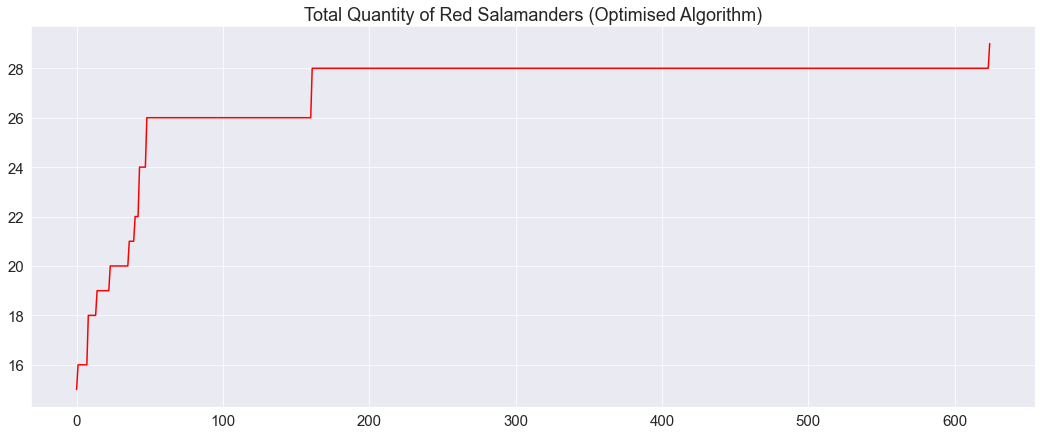

In [16]:
# Show how the number of reds changes over trials
figure(figsize=(18, 7))
plt.plot(range(len(r_vals)), r_vals, 'r')
plt.title('Total Quantity of Red Salamanders (Optimised Algorithm)')

We can see that with the optimised algorithm, the maximum number of possible Reds, 29, was reached in under 1000 iterations.